In [1]:
liste = ["abc", "agc", 'vert', 'corset', 'et', 'et', 
         'violet', 'volet']
liste

['abc', 'agc', 'vert', 'corset', 'et', 'et', 'violet', 'volet']

In [2]:
def build_trie(liste):
    trie = {}  
    for mot in liste:
        noeud = trie
        for i in range(0, len(mot)):
            lettre = mot[len(mot) - i - 1]
            if lettre not in noeud:
                noeud[lettre] = {}
            noeud = noeud[lettre]
        noeud['FIN'] = 0
    return trie

liste = ['zabc', 'abc']
t = build_trie(liste)
t

{'c': {'b': {'a': {'z': {'FIN': 0}, 'FIN': 0}}}}

In [6]:
%matplotlib inline

In [7]:
import numpy

mat = numpy.random.random((15, 15))
mat = mat + mat.T
adja = (mat >= 1.4).astype(int)
for i in range(adja.shape[0]):
    adja[i ,i] = 0
adja

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

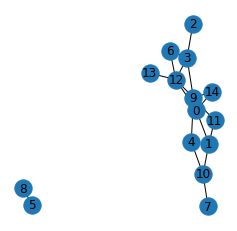

In [8]:
import networkx
import matplotlib.pyplot as plt
fix, ax = plt.subplots(1, 1,figsize=(4,4))
G = networkx.from_numpy_matrix(adja)  
networkx.draw(G, with_labels=True, ax=ax) 

In [9]:
degres = adja.sum(axis=1)
degres

array([2, 2, 3, 4, 4, 3, 6, 2])

In [10]:
distrib = {}
for d in degres:
    if d in distrib:
        distrib[d] += 1
    else:
        distrib[d] = 1
distrib

{2: 3, 3: 2, 4: 2, 6: 1}

In [11]:
mat = numpy.random.random((2, 3))
mat.sum(axis=1)

array([2.06615688, 2.07122839])

In [12]:
mat.sum(axis=0)

array([1.12367979, 1.674034  , 1.33967148])

On calcule $A + A^2 + A^3 + ... + A^n$ où n est la dimension de la matrice.

In [14]:
adjan = adja.copy()
conne = numpy.zeros(adja.shape)
for i in range(1, adja.shape[0]):
    conne += adjan
    adjan = adjan @ adja
(conne > 0).astype(int)

array([[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1]])

In [15]:
C = numpy.arange(adja.shape[0])
maj = 1
while maj > 0:
    maj = 0
    for i in range(adja.shape[0]):
        for j in range(i + 1, adja.shape[1]):
            if adja[i, j] > 0 and C[i] != C[j]:
                maj += 1
                C[i] = C[j] = min(C[i], C[j])
                
C

array([0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 0, 0, 0, 0, 0])

In [16]:
import os
os.getcwd()

'C:\\Users\\dupre.ENSAE.000\\Desktop\\td1a'